<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

- Optimization : adjusting a model to get the best performance possible on the training data
- Generalization : how well the trained model performs on data it has never seen before

### Underfitting and overfitting

- Underfitting : too simple to explian the variance
- Overfitting : too good to be true

#### Noisy training data

In real-world datasets, it's fairly common for some inputs to be invalid. (difficulty in recognizing datas)

#### Ambiguous features

#### Rare features and suspicious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)                   # add random noises

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [5]:
(len(train_images), 784)

(60000, 784)

In [4]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [7]:
np.random.random((len(train_images), 784))

array([[0.56917646, 0.98062116, 0.66567585, ..., 0.98986335, 0.0324368 ,
        0.0316645 ],
       [0.96919655, 0.36368352, 0.2722961 , ..., 0.639093  , 0.91274763,
        0.88301111],
       [0.12637665, 0.84663316, 0.82007585, ..., 0.14531497, 0.95675512,
        0.42718636],
       ...,
       [0.69525554, 0.52355716, 0.20407631, ..., 0.0847875 , 0.55145049,
        0.32899526],
       [0.92031394, 0.1037589 , 0.59535105, ..., 0.59513223, 0.29636388,
        0.808731  ],
       [0.47446628, 0.39937075, 0.81805282, ..., 0.22795343, 0.73429055,
        0.93821997]])

In [8]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():                                                                   # define our model
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.6207 - accuracy: 0.8138 - val_loss: 0.2905 - val_accuracy: 0.9100
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2516 - accuracy: 0.9224 - val_loss: 0.2130 - val_accuracy: 0.9373
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1635 - accuracy: 0.9501 - val_loss: 0.1512 - val_accuracy: 0.9562
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1144 - accuracy: 0.9639 - val_loss: 0.1336 - val_accuracy: 0.9599
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0850 - accuracy: 0.9723 - val_loss: 0.1255 - val_accuracy: 0.9645
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.1515 - val_accuracy: 0.9566
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.1386 - val_accuracy: 0.9640

In [10]:
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2913 - accuracy: 0.9152 - val_loss: 0.1544 - val_accuracy: 0.9558
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1198 - accuracy: 0.9656 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0777 - accuracy: 0.9769 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0563 - accuracy: 0.9837 - val_loss: 0.0859 - val_accuracy: 0.9749
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0415 - accuracy: 0.9881 - val_loss: 0.0821 - val_accuracy: 0.9762
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.1062 - val_accuracy: 0.9680
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0233 - accuracy: 0.9935 - val_loss: 0.0770 - val_accuracy: 0.9787

**Plotting a validation accuracy comparison**

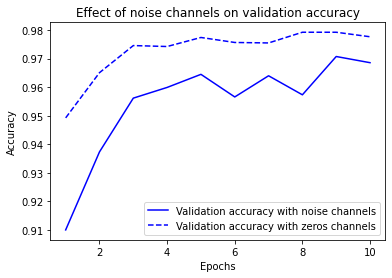

In [11]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

- noise channel has bad performance.
- not recommended to add random noise in our classification.

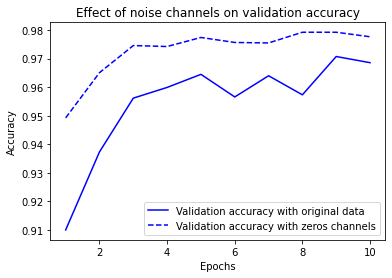

In [13]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

- They show similar performance.

### The nature of generalization in deep learning

- deep learning models can be trained to fit anything, as long as they have enough representational power.

- Even though there is no relationship between the inputs and the shuffled labels, the training loss goes down just fine.
- Naturally, the validation loss does not improve at all over time.

**Fitting a MNIST model with randomly shuffled labels**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3181 - accuracy: 0.1010 - val_loss: 2.3075 - val_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.3006 - accuracy: 0.1152 - val_loss: 2.3128 - val_accuracy: 0.0984
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2915 - accuracy: 0.1257 - val_loss: 2.3176 - val_accuracy: 0.1034
Epoch 4/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2791 - accuracy: 0.1369 - val_loss: 2.3304 - val_accuracy: 0.1024
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2611 - accuracy: 0.1524 - val_loss: 2.3452 - val_accuracy: 0.1026
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2408 - accuracy: 0.1682 - val_loss: 2.3572 - val_accuracy: 0.1046
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2178 - accuracy: 0.1785 - val_loss: 2.3571 - val_accuracy:

- accuracy increases as the model fitting continues.
- BUT bad validation accuracy, need to check our data.

#### The manifold hypothesis

- all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded.


#### Interpolation as a source of generalization

- manifold interpolation : intermediate point on the latent manifold (모두 유효한 값으로 보임)
- linear interpolation : average in the encoding space (두 그림의 평균, 합쳐진 것이므로 뚜렷하게 구분되지 않음)

#### Why deep learning works

#### Training data is paramount

- Deep learning is curve fitting.
- For a model to perform well, it needs to be trained on a dense sampling of its input space.

## Evaluating machine-learning models

- goal is to achieve models that generalize
- reliably measure the generalization power of your model

### Training, validation, and test sets

- tuning parameters and hyperparameters is a form of learning.
- tuning is based on its performance on validation set.
- tuning a low would cause information leak.

> test set 따로 두기

#### Simple hold-out validation

#### K-fold validation

- when we have small data

In [15]:
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k) :
  validation_data = data[num_validation_samples * fold : num_validation_samples * (fold + 1)]             # selects the validation data partition
  training_data = np.concatenate(
      data[:num_validation_samples * fold],
      data[num_validation_samples * (fold + 1)])
  
  model = get_model()                                                                                     # creates a brand-new instance of the model (untrained)
  model.fit(training_data, ...)
  validation_scroe = model.evaluate(validation_data, ...)
  validation_scores.append(validation_scores)

validation_score = np.average(validation_scores)                                                          # validation score : average of the validation scores of the K folds

model = get_model()                                                                                       # trains the final model on all non-test data available
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

NameError: ignored

#### Iterated K-fold validation with shuffling

- for situations in which you have relatively little data available and you need to evaluate your model as precisely as possible
- applying K-fold validation multiple times, shuffling the data every time before splitting it K ways

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

- Data representativeness : randomly shuffle data before splitting it
- The arrow of time : If you are predicting future event, don't shuffle. Use future data as test set.
- Redundancy in your data : remove redundant data before the start.

## Improving model fit

- To achieve the perfect fit, you must first overfit.
- Once you have such a model, you'll focus on refining generalization by fighting overfitting.

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [16]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 688.8575 - accuracy: 0.4079 - val_loss: 2.2777 - val_accuracy: 0.2590
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 4.7953 - accuracy: 0.2576 - val_loss: 2.1823 - val_accuracy: 0.2582
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 2.8620 - accuracy: 0.2423 - val_loss: 2.2782 - val_accuracy: 0.2864
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 3.0879 - accuracy: 0.2325 - val_loss: 2.9486 - val_accuracy: 0.2521
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8752 - accuracy: 0.2240 - val_loss: 2.1713 - val_accuracy: 0.2537
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 3.5928 - accuracy: 0.2451 - val_loss: 2.2363 - val_accuracy: 0.2998
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4497 - accuracy: 0.2511 - val_loss: 2.6505 - val_accuracy: 0.25

**The same model with a more appropriate learning rate**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3612 - accuracy: 0.9124 - val_loss: 0.1647 - val_accuracy: 0.9541
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1427 - accuracy: 0.9637 - val_loss: 0.1571 - val_accuracy: 0.9634
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1174 - accuracy: 0.9723 - val_loss: 0.2029 - val_accuracy: 0.9613
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0982 - accuracy: 0.9788 - val_loss: 0.2271 - val_accuracy: 0.9653
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0901 - accuracy: 0.9817 - val_loss: 0.2024 - val_accuracy: 0.9708
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0775 - accuracy: 0.9843 - val_loss: 0.2530 - val_accuracy: 0.9691
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0762 - accuracy: 0.9860 - val_loss: 0.2880 - val_accuracy: 0.9673

### Leveraging better architecture priors

### Increasing model capacity

- If you manage to get to a model that fits, you need to get your model to start overfitting.

**A simple logistic regression on MNIST**

In [18]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6714 - accuracy: 0.8354 - val_loss: 0.3596 - val_accuracy: 0.9051
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9034 - val_loss: 0.3079 - val_accuracy: 0.9144
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9119 - val_loss: 0.2903 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9164 - val_loss: 0.2832 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9186 - val_loss: 0.2765 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.9208 - val_loss: 0.2718 - val_accuracy: 0.9256
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.9219 - val_loss: 0.2697 - val_accuracy: 0.9267
Epoch 

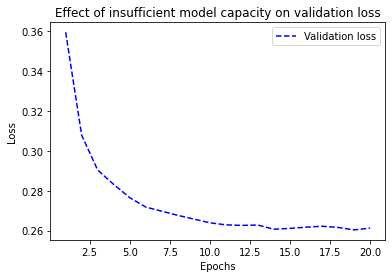

In [19]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [20]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3668 - accuracy: 0.8957 - val_loss: 0.1871 - val_accuracy: 0.9473
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1648 - accuracy: 0.9511 - val_loss: 0.1455 - val_accuracy: 0.9585
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1171 - accuracy: 0.9647 - val_loss: 0.1137 - val_accuracy: 0.9654
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0889 - accuracy: 0.9731 - val_loss: 0.1112 - val_accuracy: 0.9676
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.1096 - val_accuracy: 0.9675
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0992 - val_accuracy: 0.9705
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0960 - val_accuracy: 0.9726
Epoch 

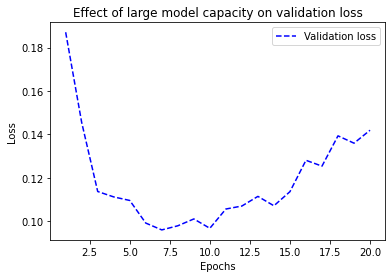

In [21]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- better result, better loss
- at the end the model is overfitting, time to solve this problem.

## Improving generalization

### Dataset curation

### Feature engineering

- process of using your own knowledge about the data to make the algorithm work better by applying hardcoded(non-learned) transformations to the data

- good features allow you to solve problems using fewer resources
- good features let you solve a problem with far less data

### Using early stopping

- Interrupt training long before you've reached the minimum possible training loss.
- In Keras, it's typical to do this with an EarlStopping callback.

### Regularizing your model

- Regularization techniques are a set of best practices that actively impede the model's ability to fit perfectly to the training data.

#### Reducing the network's size

- The simplest way to prevent overfitting is to reduce the size of the model.

**Original model**

In [22]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5093 - accuracy: 0.7929 - val_loss: 0.3854 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3116 - accuracy: 0.9039 - val_loss: 0.3267 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2326 - accuracy: 0.9263 - val_loss: 0.2842 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1865 - accuracy: 0.9412 - val_loss: 0.2795 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1529 - accuracy: 0.9519 - val_loss: 0.2780 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1261 - accuracy: 0.9625 - val_loss: 0.2842 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1082 - accurac

**Version of the model with lower capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5752 - accuracy: 0.7695 - val_loss: 0.4740 - val_accuracy: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4079 - accuracy: 0.8852 - val_loss: 0.3826 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3182 - accuracy: 0.9070 - val_loss: 0.3331 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2607 - accuracy: 0.9225 - val_loss: 0.2985 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2223 - accuracy: 0.9308 - val_loss: 0.2827 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1918 - accuracy: 0.9403 - val_loss: 0.2764 - val_accuracy: 0.8928
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1685 - accuracy: 0.9481 - val_loss: 0.2834 - val_accuracy: 0.8837
Epoch 8/20
30

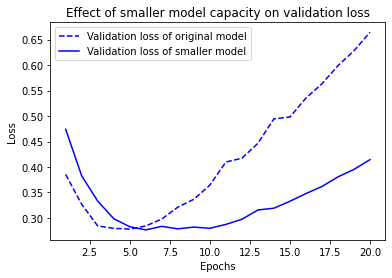

In [28]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- validation of smaller model does not overfit BUT bad performance

**Version of the model with higher capacity**

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 11s 351ms/step - loss: 0.5434 - accuracy: 0.7446 - val_loss: 0.3020 - val_accuracy: 0.8815
Epoch 2/20
30/30 [==============================] - 10s 347ms/step - loss: 0.2556 - accuracy: 0.8971 - val_loss: 0.2665 - val_accuracy: 0.8945
Epoch 3/20
30/30 [==============================] - 10s 342ms/step - loss: 0.1589 - accuracy: 0.9404 - val_loss: 0.2797 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 10s 335ms/step - loss: 0.0886 - accuracy: 0.9717 - val_loss: 0.3717 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 9s 301ms/step - loss: 0.1113 - accuracy: 0.9766 - val_loss: 0.4039 - val_accuracy: 0.8653
Epoch 6/20
30/30 [==============================] - 10s 336ms/step - loss: 0.0077 - accuracy: 0.9997 - val_loss: 0.4906 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 9s 299ms/step - loss: 8.8643e-04 - accuracy: 0.9999 - val_loss: 0.5923 - val_accuracy: 0.88

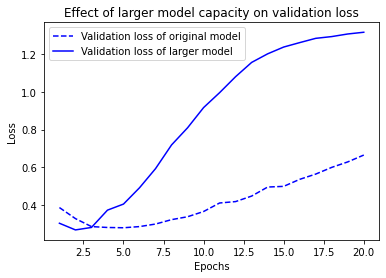

In [30]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- looks better than larger model BUT original model has overfitting after epoch#5.

#### Adding weight regularization

- SImpler models are less likely to overfit than complex ones
- Simple model is a model where the parameter values has less entropy

- L1 : LASSO / L2 : Ridge

**Adding L2 weight regularization to the model (LASSO)**

In [31]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5927 - accuracy: 0.7815 - val_loss: 0.4776 - val_accuracy: 0.8432
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3923 - accuracy: 0.8975 - val_loss: 0.3917 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3299 - accuracy: 0.9133 - val_loss: 0.3617 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2981 - accuracy: 0.9238 - val_loss: 0.3561 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2745 - accuracy: 0.9338 - val_loss: 0.3601 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2625 - accuracy: 0.9348 - val_loss: 0.3881 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2504 - accuracy: 0.9429 - val_loss: 0.3751 - val_accuracy: 0.8804
Epoch 8/20
30

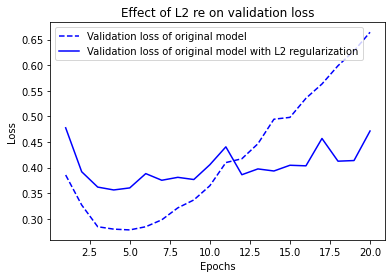

In [32]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with L2 regularization")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- validation is low, overfitting prevented
- BUT loss is worse than original one

**Different weight regularizers available in Keras**

In [33]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

- Randomly dropping out(setting to zero) a number of output features of the layer during training

**Adding dropout to the IMDB model**

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6200 - accuracy: 0.6450 - val_loss: 0.5011 - val_accuracy: 0.8523
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5004 - accuracy: 0.7747 - val_loss: 0.3967 - val_accuracy: 0.8749
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4241 - accuracy: 0.8315 - val_loss: 0.3455 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3667 - accuracy: 0.8666 - val_loss: 0.3104 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3196 - accuracy: 0.8887 - val_loss: 0.2904 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2817 - accuracy: 0.9067 - val_loss: 0.2814 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2509 - accuracy: 0.9172 - val_loss: 0.2825 - val_accuracy: 0.8895
Epoch 8/20
30

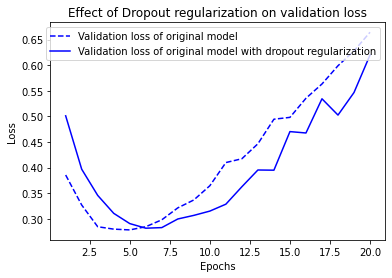

In [35]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with dropout regularization")
plt.title("Effect of Dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- better result than original model

## Summary